## MARDIANTO TANDI RAMMA

## 2109106109

### POSTTEST 6

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import OneHotEncoder

In [97]:
dataset = pd.read_csv('heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [98]:
n = 5000
if len(dataset) > n:
    random_indices = np.random.choice(len(dataset), n, replace=False)
    dataset = dataset.iloc[random_indices]

dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [99]:
X = dataset.drop('age', axis=1) 
y = dataset['age']

In [100]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [103]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [104]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

In [117]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense


data = pd.read_csv('heart.csv')


X = data.drop(columns=['target'])
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_best = SelectKBest(f_classif, k=3)


X_train_new = k_best.fit_transform(X_train, y_train)
X_test_new = k_best.transform(X_test)


model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))  # Ganti 3 dengan jumlah fitur Anda
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_new, y_train, epochs=10, batch_size=32, validation_data=(X_test_new, y_test))


Epoch 1/10


26/26 [==============================] - 1s 9ms/step - loss: 8.7497 - accuracy: 0.5159 - val_loss: 1.9104 - val_accuracy: 0.5024
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 1.1512 - accuracy: 0.4622 - val_loss: 0.8774 - val_accuracy: 0.5024
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 0.7919 - accuracy: 0.4195 - val_loss: 0.7691 - val_accuracy: 0.5024
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: 0.7530 - accuracy: 0.4024 - val_loss: 0.7352 - val_accuracy: 0.3707
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 0.7214 - accuracy: 0.4744 - val_loss: 0.7265 - val_accuracy: 0.5024
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.5220 - val_loss: 0.7005 - val_accuracy: 0.5024
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5463 - val_loss: 0.6676 - val_accuracy: 0.6439
Epoch 8/10
26/26 [=============

In [106]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                128       
                                                                 
 dense_25 (Dense)            (None, 8)                 264       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### mengompilasi model

In [107]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 1 and logs.get('val_accuracy') > 0):
            self.model.stop_training = True

In [122]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback

# Buat model Sequential
model = Sequential()

# Tambahkan lapisan masukan dengan jumlah fitur sesuai data Anda
model.add(Dense(32, input_dim=X_train_encoded.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model dengan optimizer, loss function, dan metrik yang sesuai
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Buat callback kustom
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= 0.95:
            print("\nMencapai akurasi validasi di atas 95%, hentikan pelatihan!")
            self.model.stop_training = True

# Simpan callback
kolbek = MyCallback()

# Melatih model
history = model.fit(
    X_train_encoded,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_encoded, y_test),
    callbacks=[kolbek]
)


Epoch 1/10
13/13 [==============================] - 1s 17ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 6/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5159 - val_loss: 0.6931 - val_accuracy: 0.5024
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5159 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 8/10
13/13 

In [123]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5024
Test loss: 0.6931848526000977
Test accuracy: 0.502439022064209


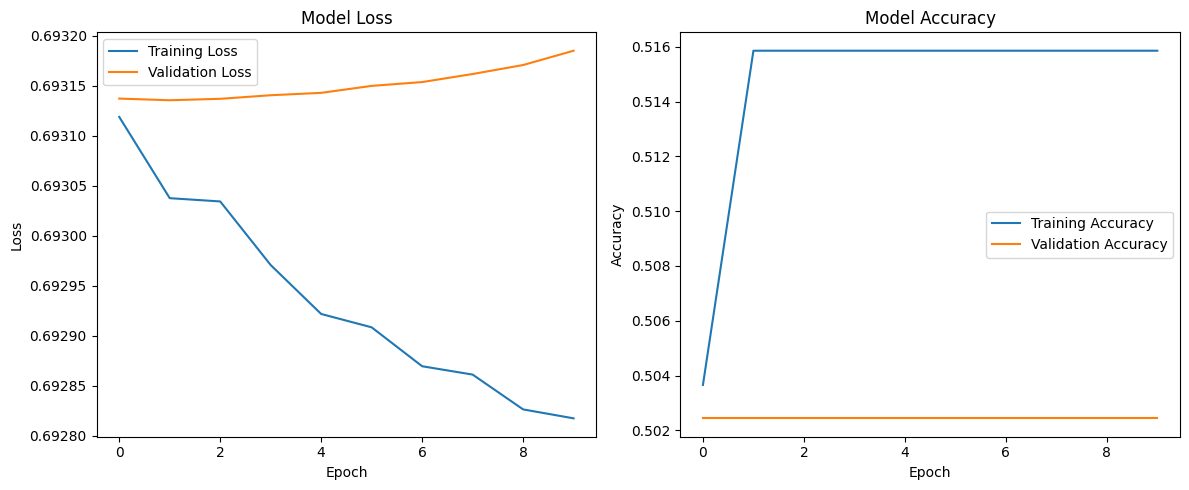

In [124]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()